In [1]:
from neuralnetwork.datasets import blobs, nregion, circle
from neuralnetwork.network import Network

Layer: L0, Neurons: 2, Activation: None, Weights: (0, 0), Biases: (0, 1)
Layer: L1, Neurons: 2, Activation: relu, Weights: (2, 2), Biases: (2, 1)
Layer: L2, Neurons: 3, Activation: relu, Weights: (3, 2), Biases: (3, 1)
Layer: L3, Neurons: 1, Activation: sigmoid, Weights: (1, 3), Biases: (1, 1)


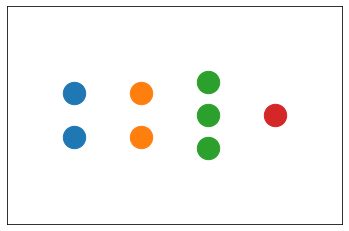

In [2]:
# Example Network
mynetwork = Network(2)
mynetwork.add_layer(2, activation = 'relu')
mynetwork.add_layer(3, activation = 'relu')
mynetwork.add_layer(1, activation = 'sigmoid')
mynetwork.summary()

# Simple Prediction

In [3]:
import numpy as np
mynetwork.layers['L1']['weights'] = np.ones_like(mynetwork.layers['L1']['weights'])
mynetwork.layers['L1']['biases'] = np.zeros_like(mynetwork.layers['L1']['biases'])

# Load Dataset

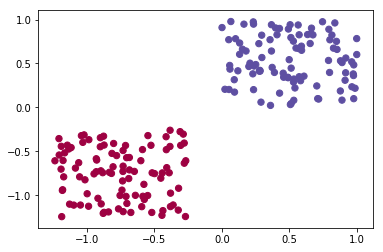

In [4]:
X,Y = blobs.load_data()
blobs.graph(X,Y)

In [5]:
# Graph Decision Boundary
#nregion.graph(X,Y,decision = mynetwork.decision)

In [6]:
mynetwork.binary_crossentropy_loss(X,Y)

0.8410707049089666